### Figure S18 of Grund & Ritter (2020) , GJI


This Jupyter Notebook is part of our GJI paper and reproduces **Fig. S18** of the Supporting Information.

Feel free to modify or play around with the different parameters!

Packages required on your system:

* PyGMT, still under development (see https://www.pygmt.org/dev/overview.html)
* pandas

author: M. Grund (2020-07-23)

In [1]:
import pygmt
import pandas as pd

In [2]:
# define parameters for plotting
pygmt.config(FONT_ANNOT_PRIMARY = '4p,Helvetica',
            FONT_LABEL = '4',
            MAP_LABEL_OFFSET = '2.5p',
            MAP_TICK_LENGTH_PRIMARY = '2p',
            PS_MEDIA ='A2',
            PROJ_LENGTH_UNIT = 'c',
            MAP_ANNOT_OFFSET_PRIMARY = '1p',
            MAP_ANNOT_OFFSET_SECONDARY = '1p',
            MAP_FRAME_TYPE = 'plain',
            MAP_FRAME_WIDTH = '1p',
            FORMAT_GEO_MAP = 'D',
            PS_CHAR_ENCODING = 'Standard+',
            MAP_FRAME_PEN = '0.8p,black')  

In [3]:
# create figure object
fig = pygmt.Figure() 

In [4]:
# define region
regvals = [3, 40, 53, 72]
cmapo = 'topo.cpt'

fig.grdimage('@earth_relief_01m', 
             region = regvals, 
             projection = 'm1:55000000', 
             cmap = cmapo)

In [5]:
# plot shorelines, borders with an immediate resolution and add a frame.
fig.coast(resolution = 'i', 
          shorelines ='1/thinnest,black', 
          frame = ['x5', 'y5'],
          borders = '1/0.25p,-')

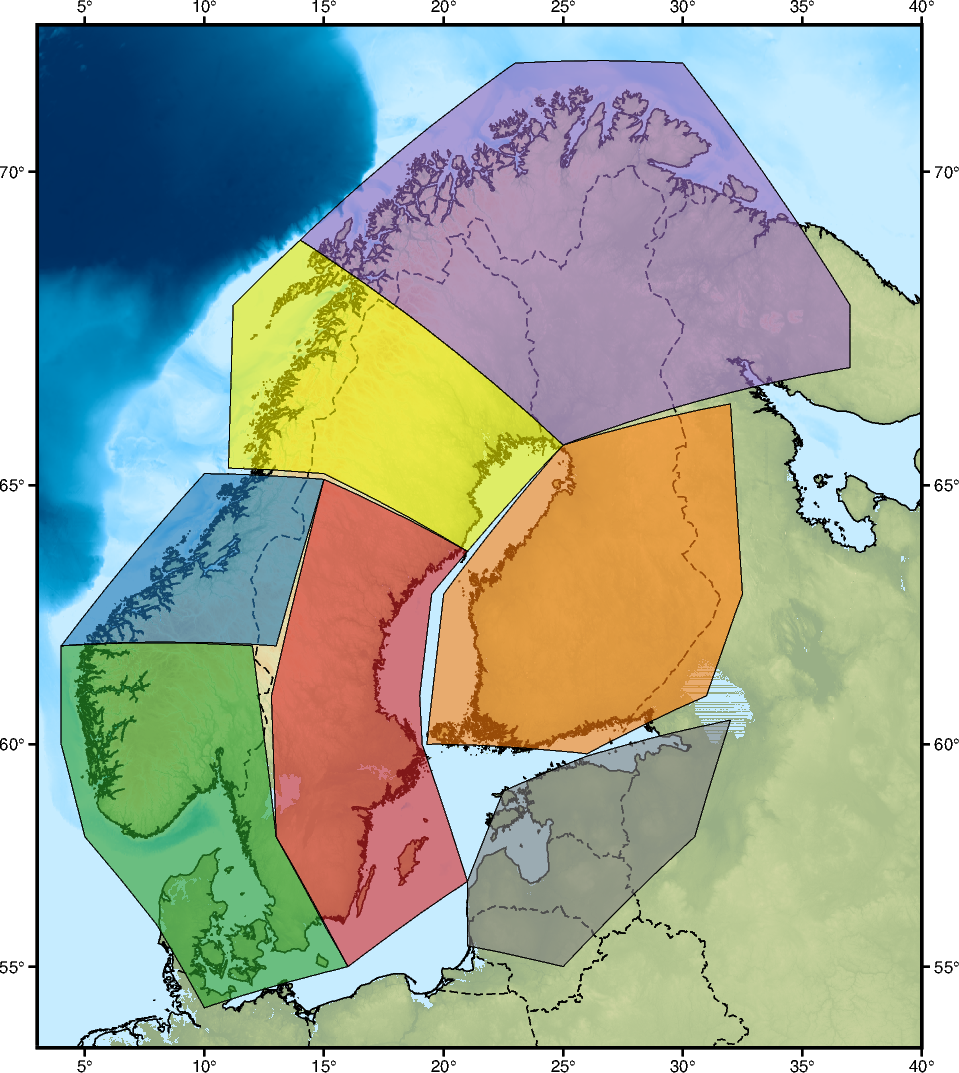

In [6]:
# thickness of edges and color
staedg = '0.005c' + 'black'

# plot the remaining ones which are the permanent stations, use transparency
fig.plot(x = [5, 4, 4, 12, 13, 15, 16, 10, 8, 5], 
         y = [58, 60, 62, 62, 58, 56, 55, 54, 56, 58], 
         pen = staedg, 
         color = '44/160/44@40', 
         label = 'southNOR')

fig.plot(x = [4.0, 10.0, 15.0, 13.0, 4.0], 
         y = [62, 65.2, 65.1,  62, 62], 
         pen = staedg, 
         color = '31/119/180@40', 
         label = 'nulls')

fig.plot(x = [20, 26.0, 31, 32.5, 32, 25, 20, 19.3], 
         y = [60, 59.8, 61, 63, 66.4, 65.7, 63, 60], 
         pen = staedg, 
         color = '255/127/14@40', 
         label = 'southFIN')

fig.plot(x = [21, 25, 30.5, 32, 26, 22.5, 21, 21], 
         y = [55.5, 55, 58, 60.5, 59.75, 59, 57, 55], 
         pen = staedg, 
         color = '127/127/127@40', 
         label = 'baltics')

fig.plot(x = [25, 14.0, 23, 30, 37, 37, 25], 
         y = [65.7, 69, 71.5, 71.5, 68, 67, 65.7], 
         pen = staedg, 
         color = '148/103/189@40', 
         label = 'northernpart')

fig.plot(x = [25, 14.0, 11.2, 11, 15, 21, 25], 
         y = [65.7, 69, 68, 65.3, 65.2, 63.8, 65.7], 
         pen = staedg, 
         color = '238/238/000@40', 
         label = 'centralpart')

fig.plot(x = [15.0, 21, 19.5, 19.0, 19.1, 21, 16.0, 13, 12.8, 15.0], 
         y = [65.1, 63.8,63, 61, 60 ,57, 55, 58, 61, 65.1], 
         pen = staedg, 
         color = '214/39/40@40', 
         label = 'southsweden')

fig.show()

In [7]:
# read file with station data using pandas
filein = 'sta_coordinates.txt'
namescol = ['staname','lon', 'lat']
datatab = pd.read_table(filein, 
                        delim_whitespace = True, 
                        names = namescol)

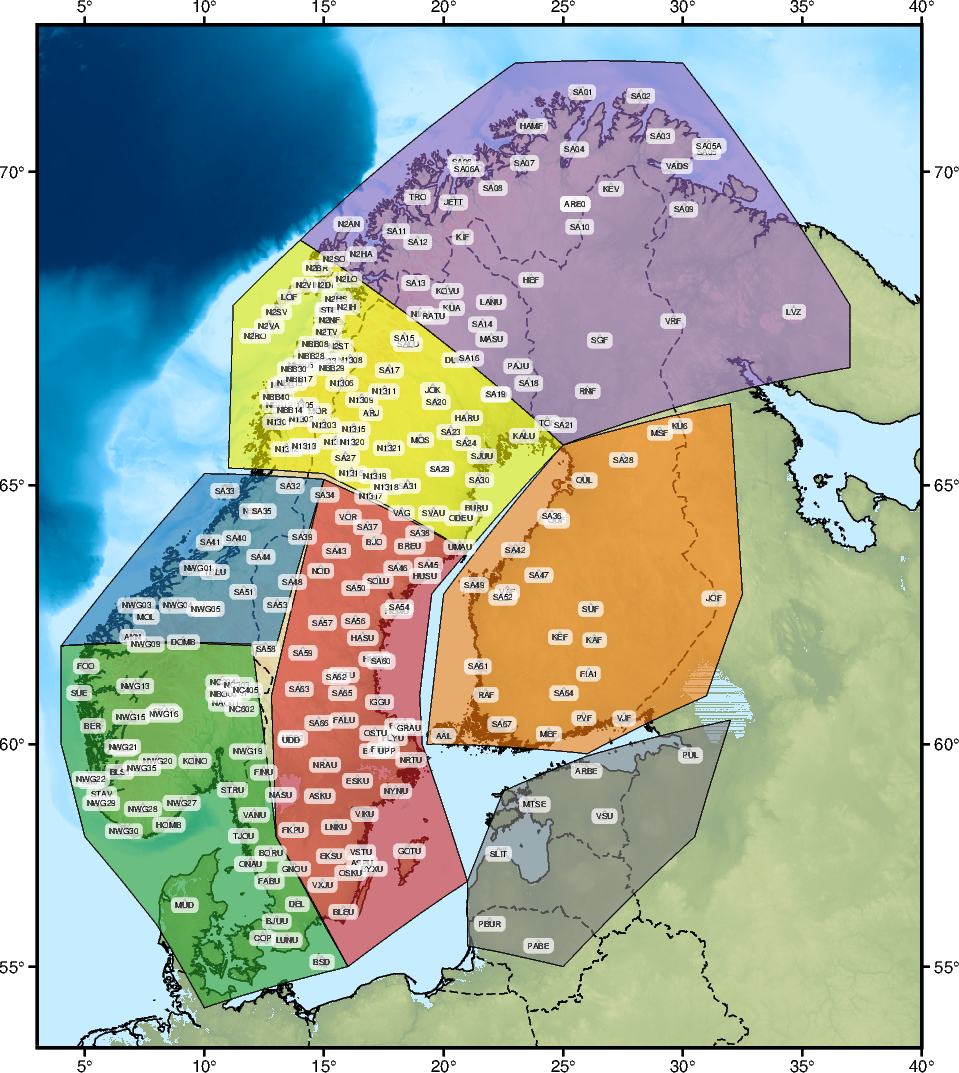

In [8]:
# now plot the locations of the full set of stations on top

# station symbol and size
stasym = 't0.1c'
# thickness of edges and color
staedg = '0.005c' + 'black'

# helper function
def plot_stas(staid, stacol, stalab):
    fig.plot(x = datatab.lon[datatab['staname'].str.startswith(staid)],
             y = datatab.lat[datatab['staname'].str.startswith(staid)], 
             style = stasym, 
             pen = staedg, 
             color = stacol, 
             label = stalab)  

# plot temporary networks based on their initial letters    
plot_stas('SA', 'gray', '"ScanArray Core"')    
plot_stas(('N2','NBB'), 'gray', 'Neonor2') 
plot_stas('N1', 'gray', 'SCANLIPS3D') 
plot_stas('NWG', 'gray', 'MAGNUS') 

# plot the remaining ones which are the permanent stations
fig.plot(x = datatab.lon[0:136], 
         y = datatab.lat[0:136], 
         style = stasym, 
         pen = staedg, 
         color = 'gray', 
         label = 'permanent')

# now we add annotations to the highlighted stations
textsize = '2p'
textbcol = 'white'
textbcoltr = '30'
txtcol = 'black'

fig.text(x = datatab.lon, 
         y = datatab.lat, 
         text = datatab.staname, 
         font = textsize + ',' + txtcol, 
         G = textbcol + '@' + textbcoltr, # use transparency for text boxes
         C = '0.015i/0.015i+tO') # adjust clearance between text and surrounding box, use rounded corners

fig.show()

In [9]:
# finally save figure in pdf format
fig.savefig('PLOT_figS18.pdf')